# Import and options

In [1]:
import pandas as pd
import numpy as np
import glob
%matplotlib inline
import json
# import Image

from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

from numpy import ones,vstack
from numpy.linalg import lstsq
import plotly as py
import plotly.graph_objs as go

import squarify
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

py.tools.set_credentials_file(username='theon', api_key='Urx3lyY3vpy94j2TJ4s4')

In [3]:
# PITCH PARAMS
pitch_length = 105
pitch_width = 68

pitch_y = [0, 13.85, 24.85, 26.5, 30.35, 37.65, 41.5, 43.15, 54.15, 68]
pitch_x = [70, 88.5, 99.5, 99.5 + 5.5/2, 105]

In [4]:
LEAGUES = {22: "Germany_Bundesliga",
           23: "Spain_Liga",
           24: "France_Ligue1",
           8: "England_PL",
           21: "Italy_SerieA",
           5: "UEFA_Champions",
           4: "World_Cup",
           6: "UEFA_Europa_League",
           3: "UEFA_Euro"}

SEASONS = {
    
}

In [5]:
RESULT_SHOT = {
    "blue": "saved",
    "yellow": "goal",
    "darkgrey": "blocked",
    "red": "off_target"
}
    
COLOR_SHOT = {
    "saved": ["#F06543", 0.5],
    "goal": ["#5EFC8D",  1],
    "blocked": ["#93BEDF", 0.25],
    "off_target": ["#639A88", 0.25]
}

COLOR_ZONE = {
    1: "#628AA1",
    2: "#7098AE",
    3: "#7FA5BB",
    4: "#8EB2C8",
    5: "#A0C1D4",
    6: "#B2CFDF",
    7: "#C5DBE8",
    8: "#FFFFFF"
}

In [1]:
COLOR_ZONE = {
    1: "#628AA1",
    2: "#7098AE",
    3: "#7FA5BB",
    4: "#8EB2C8",
    5: "#A0C1D4",
    6: "#B2CFDF",
    7: "#C5DBE8",
    8: "#FFFFFF"
}

In [7]:
MAJOR_LEAGUES = ['England_PL', 'Italy_SerieA', 'Spain_Liga', 'Germany_Bundesliga',
       'France_Ligue1']

## Read saved DataFrame

In [11]:
df= pd.read_csv("database_2702_new_xp_goal_new_zone.csv")
df.drop(df.columns[0], axis=1, inplace=True)

In [12]:
df.head()

,team_away,team_id_away,fixture_id,team_home,team_id_home,link,minute,part,result,score,...,league,result_processed,pos_start,pos_end,pos_delta,is_goal,zone,xp_goal,zone_v1,xp_goal_v1
0,Las Palmas,407,820042,Málaga,182,https://www.fourfourtwo.com/statszone/23-2015/...,9,foot_left,red,4 - 1,...,Spain_Liga,off_target,"[89.83114864864868, 45.97485714285709]","[105, 43.33499651567939]",[15.16885135 -2.63986063],0,56,0.070853,6,0.075933
1,Granada CF,5683,456532,Sevilla,179,https://www.fourfourtwo.com/statszone/23-2012/...,8,foot_left,red,3 - 0,...,Spain_Liga,off_target,"[103.3670945945946, 39.40328919860623]","[104.79590540540542, 37.27455052264804]",[ 1.42881081 -2.12873868],0,91,0.316138,3,0.313038
2,Granada CF,5683,456532,Sevilla,179,https://www.fourfourtwo.com/statszone/23-2012/...,6,foot_left,blue,3 - 0,...,Spain_Liga,saved,"[74.7782432432433, 39.257254355400654]","[103.81155405405407, 31.506174216027844]",[29.03331081 -7.75108014],0,19,0.023529,7,0.034478
3,Granada CF,5683,456532,Sevilla,179,https://www.fourfourtwo.com/statszone/23-2012/...,2,foot_left,red,3 - 0,...,Spain_Liga,off_target,"[90.7646621621622, 48.38443205574907]","[105, 38.80791637630658]",[14.23533784 -9.57651568],0,57,0.027652,6,0.075933
4,Troyes,154,438489,Toulouse,427,https://www.fourfourtwo.com/statszone/24-2012/...,46,foot_left,darkgrey,2 - 2,...,France_Ligue1,blocked,"[82.59641891891896, 22.901351916376285]","[88.75864864864869, 26.39495470383273]",[6.16222973 3.49360279],0,28,0.028911,7,0.034478


### Transform coordinates for representations

In [13]:
# Correspondence between scrapped data (top angles of pitch boxes at 71 and 650 on X coordinates to Y coordina


points_x = [(71,54.15),(645,13.85)]
x_coords, y_coords = zip(*points_x)
A = vstack([x_coords,ones(len(x_coords))]).T
m_x_transform, c_x_transform = lstsq(A, y_coords, rcond=None)[0]
print("Line Solution to transform X coordinates from scrapped datasets to Y coordinates for representation | \n y = {m}x + {c}".format(m=m_x_transform,c=c_x_transform))

print("============================")

# Correspondence between scrapped data (top angles of lines at 150 and 650 on Y coordinates to X coordinates)

points_y = [(156,105),(378,88.5)]
x_coords, y_coords = zip(*points_y)
A = vstack([x_coords,ones(len(x_coords))]).T
m_y_transform, c_y_transform = lstsq(A, y_coords, rcond=None)[0]
print("Line Solution to transform Y coordinates from scrapped datasets to x coordinates for representation | \n y = {m}x + {c}".format(m=m_y_transform,c=c_y_transform))

Line Solution to transform X coordinates from scrapped datasets to Y coordinates for representation | 
 y = -0.07020905923344939x + 59.134843205574846
Line Solution to transform Y coordinates from scrapped datasets to x coordinates for representation | 
 y = -0.07432432432432425x + 116.5945945945946


In [14]:
def transform_to_X(y):
    return m_y_transform * y + c_y_transform

def transform_to_Y(x):
    return m_x_transform * x + c_x_transform

In [16]:
def pos_start_transform(array):
    return list(map(lambda elem: [max(0.01, transform_to_X(elem[1])), max(0.01, min(pitch_width, transform_to_Y(elem[0])))], array))

def pos_end_transform(array):
    l = list(map(lambda elem: [
        min(transform_to_X(elem[1]), 105),
        min(pitch_y[5], max(pitch_y[4], transform_to_Y(elem[0]))) if elem[2] == "goal" or elem[2] == "saved" else min(pitch_width, max(0.01, transform_to_Y(elem[0])))
    ], array))
    return l

def pos_delta(array):
    return list(map(lambda elem: np.subtract(elem[1], elem[0]), array))

In [17]:
df["pos_start"] = pos_start_transform(df[["x1", "y1"]].values)
df["pos_end"] = pos_end_transform(df[["x2", "y2", "result_processed"]].values)
df["pos_delta"] = pos_delta(df[["pos_start", "pos_end"]].values)

# Data visualization | Macro

## Map number of shots collected in the 5 major European leagues

In [13]:
POSITION_COUNTRY = {
    "Italy_SerieA": [41.992834, 13.884544],
    "France_Ligue1": [46.398719, 4.233663],
    "England_PL": [53.068819, -1.646930],
    "Germany_Bundesliga": [50.771006, 10.553582],
    "Spain_Liga": [39.981012, -4.358449]
}

In [14]:
df_temp = df.groupby(["league", "season_year", "fixture_id"]).count().iloc[:, 0:1].reset_index()
df_temp.columns = ["league", "season_year", "fixture_id", "total_shots"]
df_agg = df_temp.groupby(["league", "season_year"]).agg({"fixture_id": "count", "total_shots": "sum"}).reset_index()
df_agg.columns = ["league", "season_year", "total_games", "total_shots"]
df_agg["shots_per_game"] = df_agg["total_shots"] / df_agg["total_games"]

In [281]:
df_for_map_season = df_agg.groupby(["league", "season_year"]).agg({"total_shots": "sum"}).reset_index()

,league,season_year,total_shots
0,England_PL,2010,10896
1,England_PL,2011,10661
2,England_PL,2012,10390
3,England_PL,2013,10108
4,England_PL,2014,9742
5,England_PL,2015,9644
6,England_PL,2016,9569
7,France_Ligue1,2012,8941
8,France_Ligue1,2013,8844
9,France_Ligue1,2014,8575


In [274]:
df_for_map = df_agg.groupby("league").agg({"total_shots": "sum"}).iloc[0:5, :].reset_index()

In [275]:
df_for_map["coordinates"] = df_for_map["league"].apply(lambda x : POSITION_COUNTRY[x])

In [91]:
# tmp = df_msg_incl_bs_wo_coord.join(pos_train)
# tmp = tmp[["lat", "lng"]]
# tmp.drop_duplicates(inplace=True)

# t0 = dt.datetime.now()
import folium


# Barycentre Coordinates
barycentre = [46.398719, 4.233663]

# Sample (0.33% over 1.5 million) 
data = df_for_map.values

# Build map 
map_bases = folium.Map(location=barycentre, zoom_start=3.70, 
tiles='cartodbpositron', width=640, height=480)

# Plot coordinates using comprehension list
[folium.CircleMarker(data[i][2],
                     color='#71ddc0',
                     fill_color='#71ddc0',
                     popup=data[i][0].split("_")[0] + " | # collected shots | {:,}".format(data[i][1]),
                     radius=data[i][1]*170/df_for_map["total_shots"].sum()).add_to(map_bases)
 for i in range(len(data))]


# Display map in Jupyter
display(map_bases)

In [282]:
df_for_map["lat"] = df_for_map["coordinates"].apply(lambda x: x[0])
df_for_map["lon"] = df_for_map["coordinates"].apply(lambda x: x[1])

,league,total_shots,coordinates,lat,lon
0,England_PL,71010,"[53.068819, -1.64693]",53.068819,-1.646930
1,France_Ligue1,34977,"[46.398719, 4.233663]",46.398719,4.233663
2,Germany_Bundesliga,39050,"[50.771006, 10.553582]",50.771006,10.553582
3,Italy_SerieA,49378,"[41.992834, 13.884544]",41.992834,13.884544
4,Spain_Liga,45997,"[39.981012, -4.358449]",39.981012,-4.358449


## Assess evolution of average number of shots

In [133]:
test = df_agg[df_agg["league"].isin(MAJOR_LEAGUES)].pivot_table(index="season_year", values="shots_per_game", columns="league")

In [143]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd

# cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

# df = cf.datagen.lines()
# df.head()

# Create a simple dataframe..

test.iplot(kind='scatter', filename='test')

colors = ['blue', 'orange', 'green','red', 'purple'] # Individual Line Color
dashes = ['solid', 'solid', 'dashdot', 'dash', 'solid'] # Individual Line Style
widths = [2, 4, 6, 1, 4] # Individual Line Width

layout = {
    "title": 'Average numbers of shots per game by season',
    "hovermode": 'closest',
    "xaxis": dict(
        title='Season (Year)'
    ),
    "yaxis": dict(
        title='Average number of shots taken per game'
    )
}


test.iplot(kind='scatter', mode='lines', colors=colors, dash=dashes, layout=layout, filename='line-style-and-color')

# plot_url

## Show distribution of shots by part of the body

In [150]:
pal = sns.cubehelix_palette(4, start=2.5, rot=0, dark=0.4, light=.93, reverse=True)
pal_hex = pal.as_hex() 

In [176]:
df_agg_part_league = df.groupby(["league", "part"]).agg({"shot_by": "count"}).reset_index()
df_agg_part_league.columns = ["league", "part", "total_shots"]
df_agg_part = df_agg_part_league.groupby("part").agg({"total_shots": "sum"}).reset_index()

,part,total_shots
0,head,42642
1,left_foot,78291
2,other_parts,955
3,right_foot,130526
4,unknown,24977


In [177]:
labels = df_agg_part.part.values
values = df_agg_part.total_shots.values
colors = pal_hex + ["#a2a7ad"]

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=13),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=0.5)))

layout = {
    "title": 'Repartition of collected shots data by parts used',
}

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_part')

In [187]:
part = ["right_foot", "left_foot", "head", "other_parts", "unknown"]
COLOR_SHOTS = dict(zip(part, pal_hex + ["#a2a7ad"]))

In [191]:
data = [go.Bar(x=df_agg_part_league[df_agg_part_league["part"] == part].league,
               y=df_agg_part_league[df_agg_part_league["part"] == part].total_shots,
               name=part,
                  marker=dict(color=COLOR_SHOTS[part])) 
          for part in part]
layout = go.Layout(
    barmode='stack',
    title="Number of shots collected by league"
)


fig = go.Figure(data=data, layout=layout)
py.plotly.iplot(fig, filename='stacked-bar')

# Data visualization | Pitch level

## Define pitch visualization functions

In [18]:
def draw_shots(shots, arrow=False):
    for index, shot in shots.iterrows():
        start_x = shot["pos_start"][0]
        start_y = shot["pos_start"][1]
        delta_x = shot["pos_delta"][0]
        delta_y = shot["pos_delta"][1]
        c = COLOR_SHOT[shot["result_processed"]][0]
        a = COLOR_SHOT[shot["result_processed"]][1]
        
        if arrow:
            plt.arrow(shot["pos_start"][0], shot["pos_start"][1], shot["pos_delta"][0], shot["pos_delta"][1],
                  head_width=1,
                  head_length=1,
                  color=c,
                  alpha=a,
                  length_includes_head=True)
        else:
            plt.scatter(shot["pos_start"][0], shot["pos_start"][1],
                        c = c,
                        label = shot["result_processed"],
                        s=5)

In [19]:
x_size = 105.0
y_size = 68.0

from matplotlib.patches import Arc

def create_pitch(ax, lines_color="white"):
    #set up field    
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.xlim([0,x_size])
    plt.ylim([0,y_size])

    box_height = ((40.3)/y_size)
    box_width = (16.5/x_size)

    keeper_zone_height = ((18.27)/y_size)
    keeper_zone_width = (5.5/x_size)

    r1 = plt.Rectangle((0, 0), 1, 1,
                       edgecolor=lines_color, facecolor="none", alpha=1, transform=ax.transAxes) #pitch

    r2 = plt.Line2D([0.5, 0.5], [1, 0],
                    c=lines_color, transform=ax.transAxes) #half-way line

    r3 = plt.Rectangle((0, (1-box_height)/2), box_width, box_height,
                       ec=lines_color, fc='none', transform=ax.transAxes) #penalty area

    r4 = plt.Rectangle((1-box_width, (1-box_height)/2), box_width, box_height,
                       ec=lines_color, fc='none', transform=ax.transAxes) #penalty area

    r5 = Ellipse((0.5, 0.5), 9.15*2/x_size, 9.15*2/y_size,
                                    ec=lines_color, fc='none', transform=ax.transAxes) #middle circle

    r6 = plt.Rectangle((1-keeper_zone_width, (1-keeper_zone_height)/2), keeper_zone_width, keeper_zone_height,
                       ec=lines_color, fc='none', transform=ax.transAxes) #keeper zone

    r7 = plt.Rectangle((0, (1-keeper_zone_height)/2), keeper_zone_width, keeper_zone_height,
                       ec=lines_color, fc='none', transform=ax.transAxes) #keeper zone

    r8 = plt.scatter(52.5, 34, s=15, color=lines_color) 
    
    r9 = plt.scatter(11, 34, s=15, color=lines_color) 
    
    r10 = plt.scatter(105-11, 34, s=15, color=lines_color)
    
#     arc_1 = plt.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
#     arc_2 = plt.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    ax.add_patch(Arc((11.3,68/2),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color=lines_color))
    ax.add_patch(Arc((105-11.3,68/2),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color=lines_color))
        
    fig.lines.extend([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10])

In [20]:
def draw_shots_by_zone(shots, arrow=False):
    for index, shot in shots.iterrows():
        start_x = shot["pos_start"][0]
        start_y = shot["pos_start"][1]
        delta_x = shot["pos_delta"][0]
        delta_y = shot["pos_delta"][1]
        c = COLOR_ZONE[shot["zone"]]
        
        if arrow:
            plt.arrow(shot["pos_start"][0], shot["pos_start"][1], shot["pos_delta"][0], shot["pos_delta"][1],
                  head_width=1,
                  head_length=1,
                  color=c,
                  length_includes_head=True)
        else:
            plt.scatter(shot["pos_start"][0], shot["pos_start"][1],
                        c = c,
                        label = shot["result_processed"],
                        s=5)

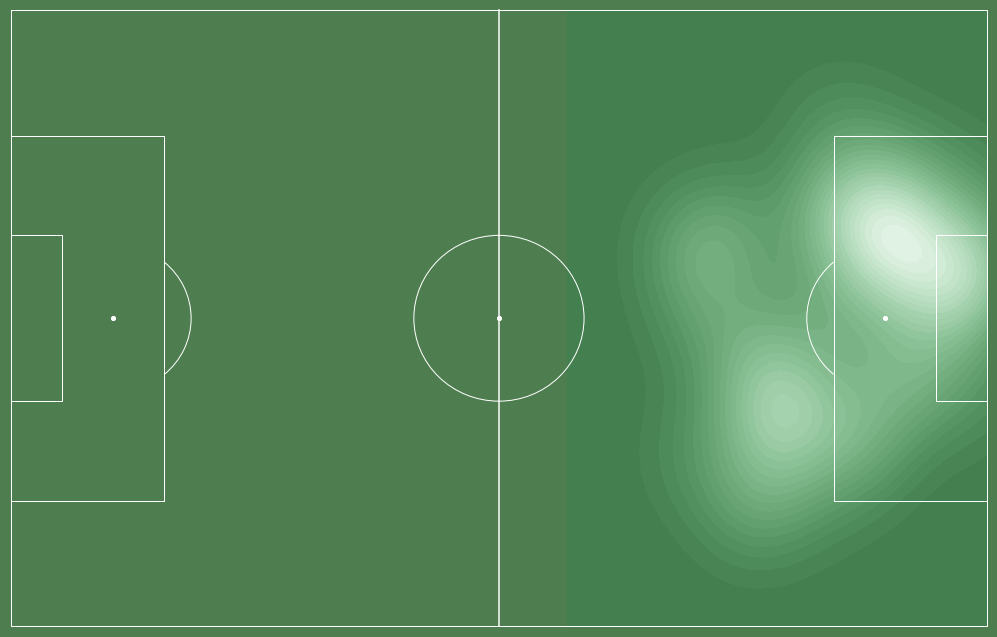

In [16]:
pos_x = [pos[0] for pos in df["pos_start"].iloc[0:50]]
pos_y = [pos[1] for pos in df["pos_start"].iloc[0:50]]

# Colours options 
pitch_color = '#4E7E4F'
line_color = 'white'


fig = plt.figure(figsize=(x_size/6, y_size/6))
fig.patch.set_facecolor(pitch_color)
ax = fig.add_subplot(1, 1, 1, facecolor=pitch_color)

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
pal = sns.cubehelix_palette(25, start=2, rot=0, dark=0.4, light=.93, reverse=True, as_cmap=True)
# sns.kdeplot(x, y, cmap=pal);
sns.kdeplot(pos_x, pos_y, shade = "True", cmap=pal, n_levels = 30)
# draw_shots(df_all.iloc[0:5000], arrow=False)
plt.xlim([0,x_size])
plt.ylim([0,y_size])
plt.axis("off")
create_pitch(ax, lines_color=line_color)
# plt.title("Distribution heatmap of shot positions on a sample of 50,000 shots", color="white", size=15)
plt.show()

## Visualize example of distribution on 5k

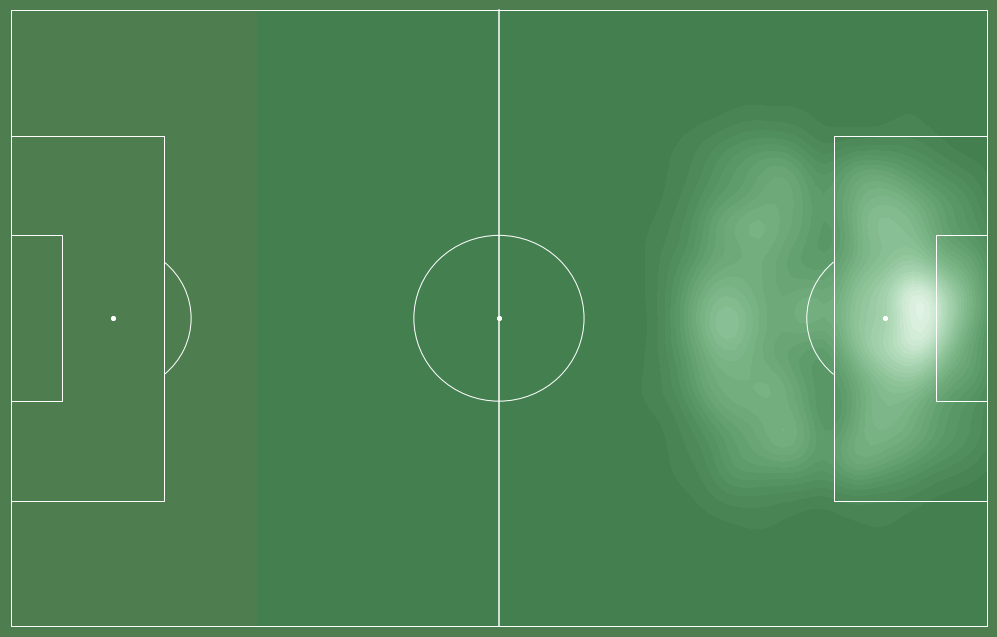

In [22]:
pos_x = [pos[0] for pos in df["pos_start"].sample(n=5000, random_state=1)]
pos_y = [pos[1] for pos in df["pos_start"].sample(n=5000, random_state=1)]

# Colours options 
pitch_color = '#4E7E4F'
line_color = 'white'


fig = plt.figure(figsize=(x_size/6, y_size/6))
fig.patch.set_facecolor(pitch_color)
ax = fig.add_subplot(1, 1, 1, facecolor=pitch_color)

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
pal = sns.cubehelix_palette(25, start=2, rot=0, dark=0.4, light=.93, reverse=True, as_cmap=True)
# sns.kdeplot(x, y, cmap=pal);
sns.kdeplot(pos_x, pos_y, shade = "True", cmap=pal, n_levels = 30)
# draw_shots(df_all.iloc[0:5000], arrow=False)
plt.xlim([0,x_size])
plt.ylim([0,y_size])
plt.axis("off")
create_pitch(ax, lines_color=line_color)
# plt.title("Distribution heatmap of shot positions on a sample of 50,000 shots", color="white", size=15)
plt.show()

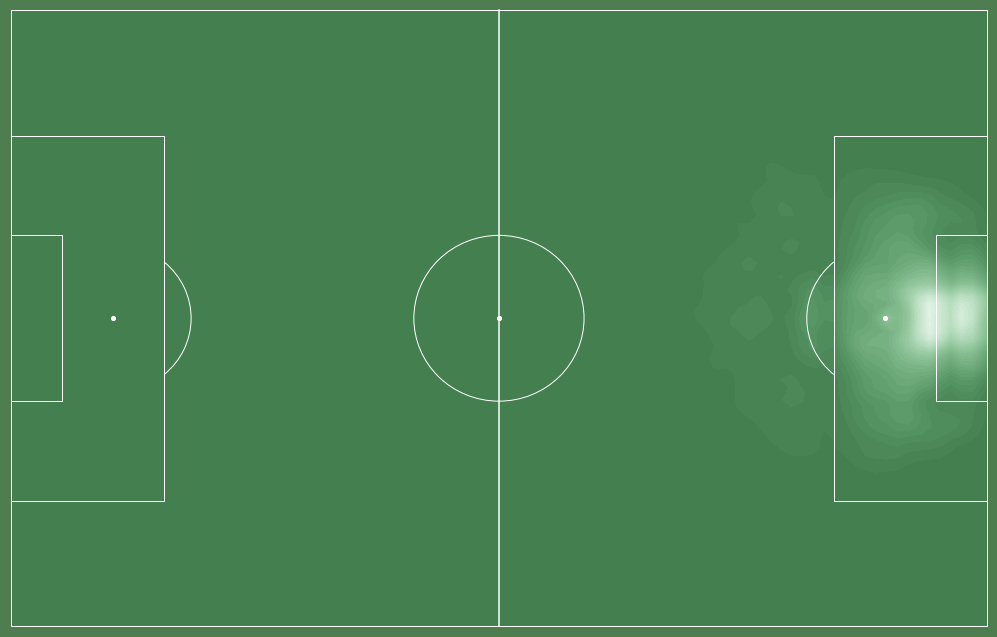

In [146]:
pos_x = [pos[0] for pos in df[df["is_goal"]==1]["pos_start"]]
pos_y = [pos[1] for pos in df[df["is_goal"]==1]["pos_start"]]

# Colours options 
pitch_color = '#4E7E4F'
line_color = 'white'


fig = plt.figure(figsize=(x_size/6, y_size/6))
fig.patch.set_facecolor(pitch_color)
ax = fig.add_subplot(1, 1, 1, facecolor=pitch_color)

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
pal = sns.cubehelix_palette(25, start=2, rot=0, dark=0.4, light=.93, reverse=True, as_cmap=True)
# sns.kdeplot(x, y, cmap=pal);
sns.kdeplot(pos_x, pos_y, shade = "True", cmap=pal, n_levels = 30)
# draw_shots(df_all.iloc[0:5000], arrow=False)
plt.xlim([0,x_size])
plt.ylim([0,y_size])
plt.axis("off")
create_pitch(ax, lines_color=line_color)
# plt.title("Distribution heatmap of shot positions on a sample of 50,000 shots", color="white", size=15)
plt.show()

In [304]:
df["check_start_0"] = df["pos_start"].apply(lambda x: x[0])
df["check_start_1"] = df["pos_start"].apply(lambda x: x[1])
df["check_end_0"] = df["pos_end"].apply(lambda x: x[0])
df["check_end_1"] = df["pos_end"].apply(lambda x: x[1])

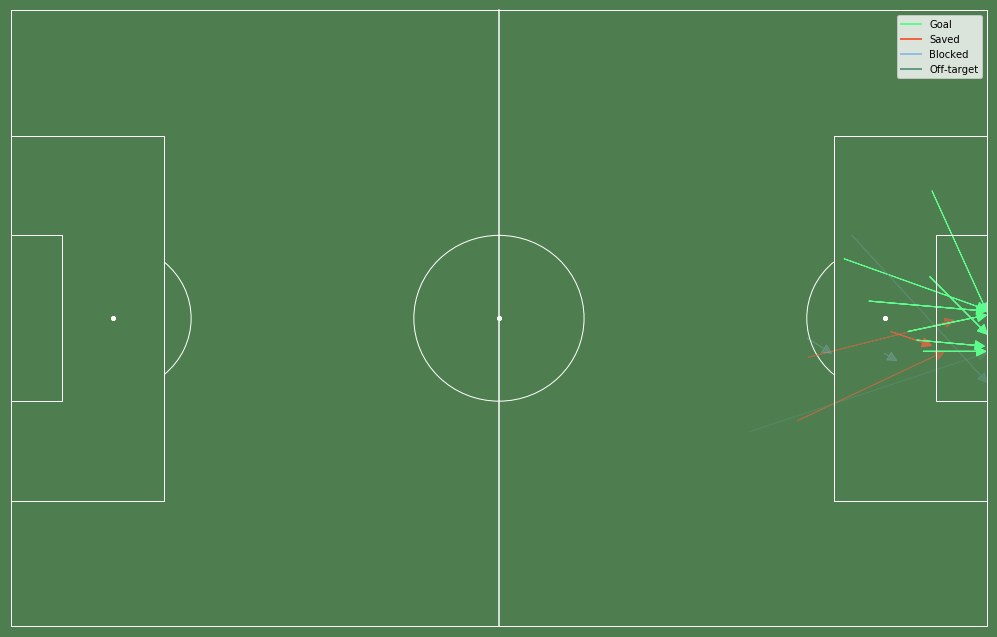

In [183]:
# Example of Germany shots against Brazil after adjusting x and y 

fig = plt.figure(figsize=(x_size/6, y_size/6))
fig.patch.set_facecolor('#4E7E4F')
ax = fig.add_subplot(1, 1, 1, facecolor='#4E7E4F')

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more bluerry it loos
pal = sns.cubehelix_palette(25, start=2, rot=0, dark=0.4, light=.93, reverse=True, as_cmap=True)
# sns.kdeplot(x, y, cmap=pal);
draw_shots(df[(df["fixture_id"]==731827)&(df["shot_by"]=="away")], arrow=True)
plt.xlim([0,x_size])
plt.ylim([0,y_size])
plt.axis("off")
create_pitch(ax)

# Add legend of shots data

custom_lines = [Line2D([0], [0], color=COLOR_SHOT["goal"][0], lw=2),
                Line2D([0], [0], color=COLOR_SHOT["saved"][0], lw=2),
                Line2D([0], [0], color=COLOR_SHOT["blocked"][0], lw=2),
                Line2D([0], [0], color=COLOR_SHOT["off_target"][0], lw=2)
               ]

ax.legend(custom_lines, ['Goal', 'Saved', 'Blocked', 'Off-target'])


plt.show()

# Matrice Shots per Goals / Total shots

https://plot.ly/python/multiple-transforms/

In [307]:
def get_columns_reviewed(side):
    if side == "away":
        columns_reviewed = ['team', 'team_id', 'fixture_id', 'link', 'minute',
       'part', 'result', 'score', 'shot_by', 'x1', 'x2', 'y1', 'y2',
       'match_date_y', 'season_year', 'league', 'result_processed',
       'pos_start', 'pos_end', 'pos_delta', 'is_goal', 'zone', 'xp_goal']
    else:
        columns_reviewed = ['fixture_id', 'team', 'team_id', 'link', 'minute',
       'part', 'result', 'score', 'shot_by', 'x1', 'x2', 'y1', 'y2',
       'match_date_y', 'season_year', 'league', 'result_processed',
       'pos_start', 'pos_end', 'pos_delta', 'is_goal', 'zone', 'xp_goal']
    return columns_reviewed

In [309]:
def process_df(df, side):
    side_against = "away" if side == "home" else "home"
    df_processed = df[df.columns.drop(list(df.filter(regex=side_against)))]
    df_processed = df_processed[df_processed["shot_by"]==side]
    df_processed.columns = get_columns_reviewed(side)
    return df_processed

In [310]:
df_home = process_df(df, "home")
df_away = process_df(df, "away")

In [311]:
df_team_view = df_away.append(df_home)

In [312]:
df_macro_stat = df_team_view[["team", "fixture_id", "league", "season_year", "shot_by", "is_goal"]]\
.groupby(["league", "team", "season_year", "fixture_id"])\
.agg({"shot_by": "count", "is_goal": "sum"})\
.reset_index()

In [313]:
df_team_stat = df_macro_stat.groupby(["league", "team"])\
.agg({"fixture_id": "count", "shot_by": ["sum", "mean"], "is_goal": "sum"})\
.reset_index()

In [314]:
df_team_stat.columns = ['_'.join(col) for col in df_team_stat.columns.values]
df_team_stat["goal_per_shot"] = df_team_stat["is_goal_sum"] / df_team_stat["shot_by_sum"]

In [320]:
df_team_stat_light = df_team_stat[df_team_stat["league_"].isin(MAJOR_LEAGUES)]
df_team_stat_light.head()

,league_,team_,fixture_id_count,shot_by_sum,shot_by_mean,is_goal_sum,goal_per_shot
0,England_PL,Arsenal,266,4088,15.368421,447,0.109344
1,England_PL,Aston Villa,228,2579,11.311404,207,0.080264
2,England_PL,Birmingham City,38,396,10.421053,35,0.088384
3,England_PL,Blackburn Rovers,75,891,11.880000,79,0.088664
4,England_PL,Blackpool,38,521,13.710526,48,0.092131


In [325]:
import plotly.offline as off

off.init_notebook_mode(connected=True)

data = []

for league in MAJOR_LEAGUES:
    trace_tmp = dict(
        type = 'scatter',
        x = df_team_stat_light[df_team_stat_light["league_"]==league]["shot_by_mean"].values,
        y = df_team_stat_light[df_team_stat_light["league_"]==league]["goal_per_shot"].values,
        text= df_team_stat_light[df_team_stat_light["league_"]==league]["team_"],
        mode = 'markers',
        name=league
    )
    data.append(trace_tmp)



layout = {
    "title": 'Attacking performance per team',
    "hovermode": 'closest',
    "xaxis": dict(
        title='# shots taken per game',
        autorange=True
    ),
    "yaxis": dict(
        title='1 / # shots per goal (=goal per shot)',
        autorange=True
    ),
    'shapes': [
        # Line Vertical
        {
            'type': 'line',
            'x0': df_team_stat_light["shot_by_mean"].mean(),
            'y0': df_team_stat_light["goal_per_shot"].min() + 0.005,
            'x1': df_team_stat_light["shot_by_mean"].mean(),
            'y1': df_team_stat_light["goal_per_shot"].max() + 0.005,
            'line': {
                'color': '#a2a7ad',
                'width': 1.5,
                'dash': 'solid',
            },
        },
        # Line Horizontal
        {
            'type': 'line',
            'x0': df_team_stat_light["shot_by_mean"].min() + 0.005,
            'y0': df_team_stat_light["goal_per_shot"].mean(),
            'x1': df_team_stat_light["shot_by_mean"].max() + 0.005,
            'y1': df_team_stat_light["goal_per_shot"].mean(),
            'line': {
                'color': '#a2a7ad',
                'width': 1.5,
                'dash': 'solid',
            },
        },
    ]
}

fig = {
    'data': data,
    'layout': layout,
}

off.iplot(fig, validate=False)

# XP Goal

## Defining zone - Grid test

In [22]:
zone_x = [0, 72, 77.5, 83.0, 88.5, 94.0, 99.5, 102.25, 105]

In [23]:
zone_y = [0, 13.85 - 5.5, 13.85, 31.25-5.5*2, 31.25-5.5, 31.25, 31.25+5.5, 31.25+5.5*2, 31.25+5.5*3, pitch_y[-2], pitch_y[-2]+5.5, pitch_y[-1]]

In [79]:
import itertools

zones_table = pd.DataFrame(list(itertools.product(zone_x, zone_y)))
zones_table.columns = ["x", "y"]

In [80]:
zones_table["zone"] = list(range(1, zones_table.shape[0]+1))

In [122]:
zones_table.loc[(zones_table["y"]<zone_y[1]), "zone"] = 200
zones_table.loc[(zones_table["y"]>=zone_y[-2]), "zone"] = 201
# zones_table.loc[(zones_table["y"]>=zone_y[-2]), "zone"] = 202
zones_table.loc[(zones_table["y"]<=zone_y[4])&(zones_table["test[(test["check_start_0"] > zone_x[-3])&(test["check_start_1"] > zone_y[1])&(test["check_start_1"] < zone_y[3])]["pos_start"]x"]>=zone_x[-2])&(zones_table["y"]>=zone_y[1]), "zone"] = 203
zones_table.loc[zones_table["x"]<zone_x[1], "zone"] = 210

In [155]:
def zones_lookup(row):
    tmp_1 = zones_table[zones_table["x"]<row["pos_start"][0]]
    tmp_2 = tmp_1.iloc[tmp_1['x'].iloc[(tmp_1['x']-row["pos_start"][0]).abs().argsort()[:12]].index]
    tmp_3 = tmp_2[tmp_2["y"]<row["pos_start"][1]]
    zone = tmp_3["zone"].iloc[(tmp_3["y"]-row["pos_start"][1]).abs().argsort()[:1]].values[0]
    return zone

def zones_consolidation(row):
    if row["pos_start"][0]<zone_x[1]:
        return 200
    elif (row["pos_start"][1]>zone_y[-2]):
        return 201
    elif  (row["pos_start"][1]<zone_y[1]):
        return 202
    elif (row["pos_start"][0]>zone_x[-3])&(row["pos_start"][1]>zone_y[1])&(row["pos_start"][1]<zone_y[3]):
        return 203
    elif (row["pos_start"][0]>zone_x[-3])&(row["pos_start"][1]>zone_y[-4])&(row["pos_start"][1]<zone_y[-2]):
        return 204
    else:
        return row["zone"]

In [156]:
test = df.copy().iloc[0:15000]
test["check_start_0"] = test["pos_start"].apply(lambda x: x[0])
test["check_start_1"] = test["pos_start"].apply(lambda x: x[1])
test["check_end_0"] = test["pos_end"].apply(lambda x: x[0])
test["check_end_1"] = test["pos_end"].apply(lambda x: x[1])

In [157]:
test["zone"] = test.apply(zones_lookup, axis=1)
test["zone"] = test.apply(zones_consolidation, axis=1)

In [158]:
COLOR_ZONE = dict(zip(list(range(1,71)), sns.cubehelix_palette(71, start=.5, rot=-.75, reverse=True)))
COLOR_ZONE = dict(zip(list(range(1,71)), sns.cubehelix_palette(71, start=15, rot=10, reverse=True)))
COLOR_ZONE = dict(zip(list(range(1,zones_table.shape[0])), sns.cubehelix_palette(zones_table.shape[0], start=100, dark=0.5, rot=19199119191919, reverse=True)))
COLOR_ZONE = dict(zip(list(range(1,zones_table.shape[0])), sns.diverging_palette(160, 24, n=110, sep=1)))
COLOR_ZONE = dict(zip(list(range(1,zones_table.shape[0])), (sns.cubehelix_palette(4, start=.4, rot=-.75, reverse=True) + sns.cubehelix_palette(4, start=.4, rot=-.75, reverse=False)) * 20))
COLOR_ZONE = dict(zip(list(range(1,zones_table.shape[0])), (["yellow", "orange", "purple", "blue"] + ["orange", "blue", "yellow", "black"]) * 20))

# sns.cubehelix_palette(4, start=.4, rot=-.75, reverse=True)

In [161]:
COLOR_ZONE[200] = 'red'
COLOR_ZONE[201] = 'purple'
COLOR_ZONE[202] = "purple"
COLOR_ZONE[203] = "black"
COLOR_ZONE[204] = "white"

In [53]:
def zones_lookup_individual(pos):
    print(pos)
    tmp_1 = zones_table[zones_table["x"]<pos[0]]
    print(tmp_1)
    tmp_2 = tmp_1.iloc[tmp_1['x'].iloc[(tmp_1['x']-pos[0]).abs().argsort()[:12]].index]
    print(tmp_2)
    tmp_3 = tmp_2[tmp_2["y"]<pos[1]]
    print(tmp_3)
    zone = tmp_3["zone"].iloc[(tmp_3["y"]-pos[1]).abs().argsort()[:1]].values[0]
    return zone

## Drawing zones representation for medium article

In [25]:
zone_y_viz = zone_y[1:-1]
zone_x_viz = zone_x[1:]

In [44]:
colors = sns.cubehelix_palette(4, start=.4, rot=-.75, reverse=True)
colors = sns.diverging_palette(220, 20, n=4)
colors = sns.cubehelix_palette(8, start=.5, rot=-.75)[2:4]

In [55]:
zone_x_viz

[72, 77.5, 83.0, 88.5, 94.0, 99.5, 102.25, 105]

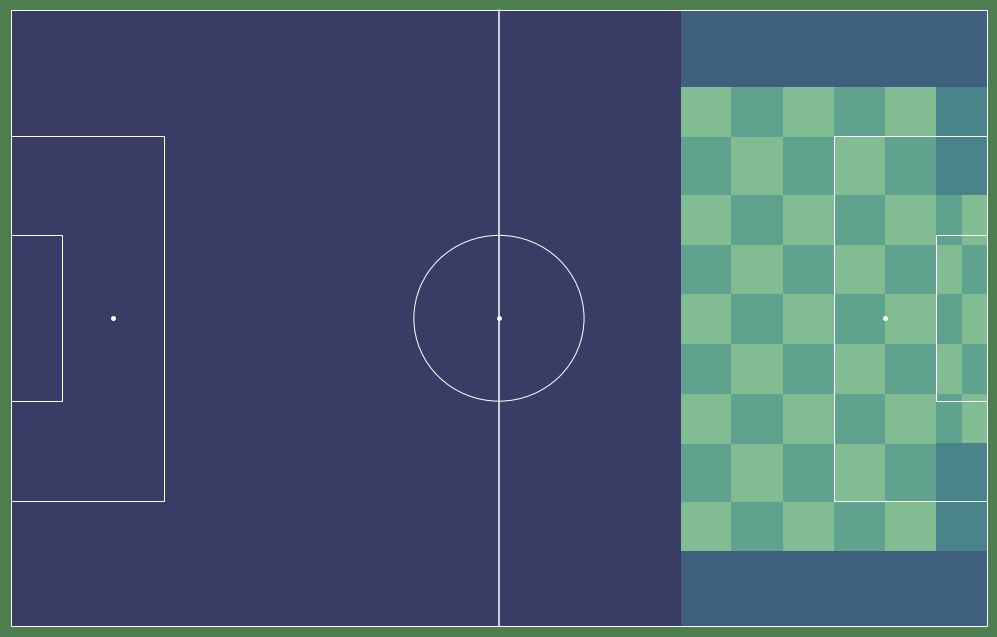

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import random
fig = plt.figure(figsize=(x_size/6, y_size/6))
fig.patch.set_facecolor('#4E7E4F')
ax = fig.add_subplot(1, 1, 1, facecolor='#4E7E4F')

id_color = 0

for idx, x in enumerate(zone_x):
    for idy, y in enumerate(zone_y):
        if (idx < len(zone_x_viz)-1) and (idy < len(zone_y_viz)-1):
            ax.add_artist(mpatch.Rectangle((zone_x_viz[idx], zone_y_viz[idy]), zone_x_viz[idx+1]-zone_x_viz[idx], zone_y_viz[idy+1]-zone_y_viz[idy], color=colors[id_color]))
            if id_color < len(colors)-1:
                id_color +=1
            else:
                id_color = 0
ax.add_artist(mpatch.Rectangle((zone_x_viz[-3], zone_y_viz[0]), zone_x_viz[-1]-zone_x_viz[-3], zone_y_viz[3]-zone_y_viz[1], color=sns.cubehelix_palette(8, start=.5, rot=-.75)[4]))
ax.add_artist(mpatch.Rectangle((zone_x_viz[-3], zone_y_viz[7]), zone_x_viz[-1]-zone_x_viz[-3], zone_y_viz[3]-zone_y_viz[1], color=sns.cubehelix_palette(8, start=.5, rot=-.75)[4]))
ax.add_artist(mpatch.Rectangle((zone_x_viz[0], zone_y_viz[-1]), zone_x_viz[-1]-zone_x_viz[0], 68-zone_y_viz[-1], color=sns.cubehelix_palette(8, start=.5, rot=-.75)[5]))
ax.add_artist(mpatch.Rectangle((zone_x_viz[0], 0), zone_x_viz[-1]-zone_x_viz[0], zone_y_viz[0], color=sns.cubehelix_palette(8, start=.5, rot=-.75)[5]))
ax.add_artist(mpatch.Rectangle((0, 0), zone_x_viz[0], 68, color=sns.cubehelix_palette(8, start=.5, rot=-.75)[6]))
create_pitch(ax)
# plt.title("Delimitation of pitch zones (8)", color="white", fontsize=15)
plt.savefig('grid_graph.png')
# Image.open('zone_graph.png').save('zone_graph.jpg','JPEG')
plt.show()

## Defining zone and Calculate XP - Grid - DF Total

In [ ]:
def zones_lookup(row):
    if row["pos_start"][0]<zone_x[1]:
        return 200
    elif (row["pos_start"][1]>zone_y[-2]):
        return 201
    elif  (row["pos_start"][1]<zone_y[1]):
        return 202
    elif (row["pos_start"][0]>zone_x[-3])&(row["pos_start"][1]>zone_y[1])&(row["pos_start"][1]<zone_y[3]):
        return 203
    elif (row["pos_start"][0]>zone_x[-3])&(row["pos_start"][1]>zone_y[-4])&(row["pos_start"][1]<zone_y[-2]):
        return 204
    else:
        return row["zone"]
    tmp_1 = zones_table[zones_table["x"]<row["pos_start"][0]]
    tmp_2 = tmp_1.iloc[tmp_1['x'].iloc[(tmp_1['x']-row["pos_start"][0]).abs().argsort()[:12]].index]
    tmp_3 = tmp_2[tmp_2["y"]<row["pos_start"][1]]
    zone = tmp_3["zone"].iloc[(tmp_3["y"]-row["pos_start"][1]).abs().argsort()[:1]].values[0]
    return zone

def zones_consolidation(row):
    if row["pos_start"][0]<zone_x[1]:
        return 200
    elif (row["pos_start"][1]>zone_y[-2]):
        return 201
    elif  (row["pos_start"][1]<zone_y[1]):
        return 202
    elif (row["pos_start"][0]>zone_x[-3])&(row["pos_start"][1]>zone_y[1])&(row["pos_start"][1]<zone_y[3]):
        return 203
    elif (row["pos_start"][0]>zone_x[-3])&(row["pos_start"][1]>zone_y[-4])&(row["pos_start"][1]<zone_y[-2]):
        return 204
    else:
        return row["zone"]

In [172]:
# df["zone"] = df.apply(zones_lookup, axis=1)
df["zone"] = df.apply(zones_consolidation, axis=1)

In [173]:
df_xp = df[(df["is_goal"] == 1)&(df["part"] != "unknown")&(df["part"] != "other_parts")].groupby(["zone", "part"]).count() / df[df["part"]!="unknown"].groupby(["zone","part"]).count()

In [174]:
df_xp = pd.DataFrame(df_xp["result"]).reset_index()

In [176]:
df_xp = df_xp.set_index(["zone", "part"])

In [178]:
def xp_calc(row):
#     print(row["zone"])
#     print(row["part"])
    try:
        return df_xp.loc[(row["zone"], row["part"]), :][0]
    except KeyError:
        return 0

In [181]:
df["xp_goal"] = df.apply(xp_calc, axis=1)

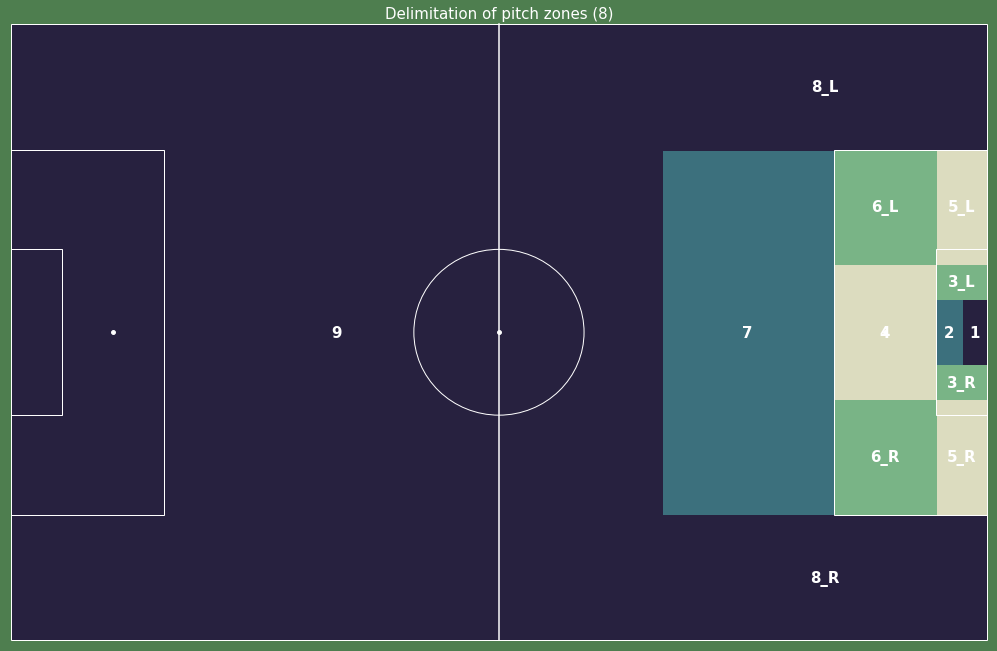

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

fig = plt.figure(figsize=(x_size/6, y_size/6))
fig.patch.set_facecolor('#4E7E4F')
ax = fig.add_subplot(1, 1, 1, facecolor='#4E7E4F')

rectangles = {'1' : mpatch.Rectangle((pitch_x[3],pitch_y[4]), pitch_x[4]-pitch_x[3], pitch_y[5]-pitch_y[4], color=COLOR_ZONE[1]),
              '2' : mpatch.Rectangle((pitch_x[2],pitch_y[4]), pitch_x[3]-pitch_x[2], pitch_y[5]-pitch_y[4], color=COLOR_ZONE[2]),
              '3_R' : mpatch.Rectangle((pitch_x[2],pitch_y[3]), pitch_x[-1]-pitch_x[2], pitch_y[4]-pitch_y[3], color=COLOR_ZONE[3]),
              '3_L' : mpatch.Rectangle((pitch_x[2],pitch_y[5]), pitch_x[-1]-pitch_x[2], pitch_y[6]-pitch_y[5], color=COLOR_ZONE[3]),
              '4' : mpatch.Rectangle((pitch_x[1],pitch_y[3]), pitch_x[2]-pitch_x[1], pitch_y[6]-pitch_y[3], color=COLOR_ZONE[4]),
              '5_R' : mpatch.Rectangle((pitch_x[2],pitch_y[1]), pitch_x[-1]-pitch_x[2], pitch_y[3]-pitch_y[1], color=COLOR_ZONE[5]),
              '5_L' : mpatch.Rectangle((pitch_x[2],pitch_y[6]), pitch_x[-1]-pitch_x[2], pitch_y[8]-pitch_y[6], color=COLOR_ZONE[5]),
              '6_R' : mpatch.Rectangle((pitch_x[1],pitch_y[1]), pitch_x[2]-pitch_x[1], pitch_y[8]-pitch_y[6], color=COLOR_ZONE[6]),
              '6_L' : mpatch.Rectangle((pitch_x[1],pitch_y[6]), pitch_x[2]-pitch_x[1], pitch_y[8]-pitch_y[6], color=COLOR_ZONE[6]),
              '7' : mpatch.Rectangle((pitch_x[0],pitch_y[1]), pitch_x[1]-pitch_x[0], pitch_y[-2]-pitch_y[1], color=COLOR_ZONE[7]),
              '8_R' : mpatch.Rectangle((pitch_x[0],0), pitch_x[-1]-pitch_x[0], pitch_y[1], color=COLOR_ZONE[8]),
              '8_L' : mpatch.Rectangle((pitch_x[0],pitch_y[-2]), pitch_x[-1]-pitch_x[0], pitch_y[1], color=COLOR_ZONE[8]),
              '9' : mpatch.Rectangle((0,0), pitch_x[0], pitch_y[-1], color=COLOR_ZONE[9])
             }
hfont = {'fontname':'Helvetica'}

for r in rectangles:
    ax.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    ax.annotate(r, (cx, cy), color='w', weight='bold', 
                fontsize=15, ha='center', va='center')
# ax.set_xlim((0, 15))
# ax.set_ylim((0, 15))
# ax.set_aspect('equal')
create_pitch(ax)
plt.title("Delimitation of pitch zones (8)", **hfont, color="white", fontsize=15)
plt.savefig('zone_graph.png')
# Image.open('zone_graph.png').save('zone_graph.jpg','JPEG')
plt.show()

# Team performace analysis based on XP goals

## Loading df_team_long dataframe

In [346]:
df_team_long = pd.read_csv("df_team_long.csv")

## Creating df_team_long dataframe

In [185]:
df["pos_start"].iloc[0]

[89.83114864864868, 45.97485714285709]

In [186]:
df_temp = df.sort_values(["fixture_id", "minute"])

In [187]:
def is_goal_side(row, side):
    result = 1 if row["result_processed"] == "goal" and row["shot_by"] == side else 0
    return result

In [196]:
df_temp["score_home"] = df_temp["score"].apply(lambda x: int(x.split(" - ")[0]))
df_temp["score_away"] = df_temp["score"].apply(lambda x: int(x.split(" - ")[1]))

# Define columns to record goals for and against away team

df_temp["goal_for_home"] = df_temp["score_home"]
df_temp["goal_against_home"] = df_temp["score_away"]

# Define columns to record goals for and against away team

df_temp["goal_for_away"] = df_temp["score_away"]
df_temp["goal_against_away"] = df_temp["score_home"]

In [197]:
df_score = df_temp[["fixture_id", "match_date", "league", "season_year", "team_away", "team_home", "score_away", "score_home", "goal_for_home", "goal_against_home", "goal_for_away", "goal_against_away"]].drop_duplicates()

In [198]:
df_score_xp = df_temp.groupby(["fixture_id", "shot_by"]).agg({"xp_goal": "sum"}).reset_index().pivot_table(columns="shot_by", values="xp_goal", index="fixture_id").reset_index()

In [199]:
df_team = pd.concat([df_score.set_index("fixture_id"), df_score_xp.set_index("fixture_id")], axis=1).reset_index()
df_team.rename(columns={'away':'xp_away',
                    'home':'xp_home'}, inplace=True)
df_team.head()

,fixture_id,match_date,league,season_year,team_away,team_home,score_away,score_home,goal_for_home,goal_against_home,goal_for_away,goal_against_away,xp_away,xp_home
0,321657,2010-08-14 15:00:00,England_PL,2010,West Ham United,Aston Villa,0,3,3,0,0,3,0.809138,3.389169
1,321658,2010-08-14 15:00:00,England_PL,2010,Everton,Blackburn Rovers,0,1,1,0,0,1,1.505867,0.587266
2,321659,2010-08-14 15:00:00,England_PL,2010,Blackpool,Wigan Athletic,4,0,0,4,4,0,1.918771,1.191305
3,321660,2010-08-14 15:00:00,England_PL,2010,Fulham,Bolton Wanderers,0,0,0,0,0,0,1.366111,0.571520
4,321661,2010-08-14 17:30:00,England_PL,2010,West Bromwich Albion,Chelsea,0,6,6,0,0,6,0.304474,3.507508


In [200]:
def calculate_points(team_for, team_against):
    # Calculate the number of points gained from a game for team_for
    for score in zip(team_for, team_against):
        if score[0] < score[1]:
            yield 0
        elif score[0] == score[1]:
            yield 1
        else:
            yield 3

def diff_scoring(team_for, team_against):
    return np.subtract(team_for, team_against)

In [202]:
df_team["point_away"] = list(calculate_points(df_team["score_away"].values, df_team["score_home"].values))
df_team["point_home"] = list(calculate_points(df_team["score_home"].values, df_team["score_away"].values))

df_team["xpoint_away"] = list(calculate_points(df_team["xp_away"].values, df_team["xp_home"].values))
df_team["xpoint_home"] = list(calculate_points(df_team["xp_home"].values, df_team["xp_away"].values))

df_team["deltaGoal_away"] = diff_scoring(df_team["score_away"].values, df_team["score_home"].values)
df_team["deltaGoal_home"] = diff_scoring(df_team["score_home"].values, df_team["score_away"].values)

df_team["deltaXpGoal_away"] = diff_scoring(df_team["xp_away"].values, df_team["xp_home"].values)
df_team["deltaXpGoal_home"] = diff_scoring(df_team["xp_home"].values, df_team["xp_away"].values)

In [204]:
df_team_long = pd.wide_to_long(df_team, stubnames=['team', 'score', 'goal_for', 'goal_against', 'xp', 'point', 'xpoint', 'deltaGoal', 'deltaXpGoal'], i=['league', 'season_year', 'fixture_id', 'match_date'], j='side',
                        sep='_', suffix='\D+')

In [206]:
df_team_long = df_team_long.reset_index()

In [207]:
df_team_long.head()

,league,season_year,fixture_id,match_date,side,team,score,goal_for,goal_against,xp,point,xpoint,deltaGoal,deltaXpGoal
0,England_PL,2010,321657,2010-08-14 15:00:00,away,West Ham United,0,0,3,0.809138,0,0,-3,-2.580031
1,England_PL,2010,321657,2010-08-14 15:00:00,home,Aston Villa,3,3,0,3.389169,3,3,3,2.580031
2,England_PL,2010,321658,2010-08-14 15:00:00,away,Everton,0,0,1,1.505867,0,3,-1,0.918601
3,England_PL,2010,321658,2010-08-14 15:00:00,home,Blackburn Rovers,1,1,0,0.587266,3,0,1,-0.918601
4,England_PL,2010,321659,2010-08-14 15:00:00,away,Blackpool,4,4,0,1.918771,3,3,4,0.727467


In [208]:
df_team_long["cumPoint"] = df_team_long.groupby(["league", "season_year", "team"])["point"].cumsum()

In [209]:
df_team_long["gameday"] = df_team_long.groupby(["league", "season_year", "team"])["point"].cumcount() + 1

In [210]:
df_team_long["cumGoalDiff"] = df_team_long.groupby(["league", "season_year", "team"])["deltaGoal"].cumsum()

In [211]:
df_team_long["cumAttack"] = df_team_long.groupby(["league", "season_year", "team"])["goal_for"].cumsum()

In [212]:
df_team_long["cumDefense"] = df_team_long.groupby(["league", "season_year", "team"])["goal_against"].cumsum()

In [234]:
df_team_long["ranking"] = df_team_long.sort_values(["cumGoalDiff", "cumAttack", "cumDefense", "team"], ascending=[False, False, True, True]).groupby(["league", "season_year", "gameday"])["cumPoint"].rank(method="first", ascending=False)

In [242]:
df_team_long["ranking"] = df_team_long["ranking"].astype(int)

In [266]:
def show(team, league, season):
    
    max_league_position = df_team_long[(df_team_long["season_year"]==season)\
                       &(df_team_long["league"]==league)\
                       ]["ranking"].max()
    
    temp = df_team_long[(df_team_long["season_year"]==season)\
                        &(df_team_long["team"]==team)\
                       &(df_team_long["league"]==league)\
                       ]
    viz = pd.DataFrame({"rolling_xp": temp['deltaXpGoal'].rolling(window=5).mean(),
                    "rolling_actual": temp['deltaGoal'].rolling(window=5).mean(),
                        "ranking": temp["ranking"],
                   "game_number": list(range(1, temp.shape[0]+1))})
    # Create a trace
    trace_xp = go.Scatter(
        x = viz["game_number"],
        y = viz["rolling_xp"],
#         mode = 'lines+markers',
        mode="lines",
        name = 'XP Goals Difference | Rolling average'
    )

    trace_act = go.Scatter(
        x = viz["game_number"],
        y = viz["rolling_actual"],
#         mode = 'lines+markers',
        mode="lines",
        name = 'Actual Goals Difference | Rolling average'
    )
    
    trace_ranking = go.Scatter(
        x = viz["game_number"],
        y = viz["ranking"],
        mode = 'lines+markers',
        line= {'dash': 'dash', "width":0.5},
        name = 'Ranking',
        yaxis='y2',
        marker = dict(
        size = 5,
            symbol="pentagon-open",
        color = '#7a7d82')
    )

    layout = {
        "title": 'Comparison of 5-game Rolling Average of Expected Goals Difference vs. Actual Goals Difference \n {} | {}-{}'.format(team,str(season),str(season+1)),
        "hovermode": 'closest',
        "xaxis": dict(
            title='Game',
            showline=False
        ),
        "yaxis": dict(
            title='5-game Rolling Average Goal Difference'
        ),
        "yaxis2": dict(
#             autorange="reversed",
            dtick=1,
            range=[max_league_position, 0.01],
            title='League Ranking',
            overlaying='y',
            showgrid=False,
            showline=False,
            side='right')
    }


    data = [trace_xp, trace_act, trace_ranking]
    fig = go.Figure(data=data, layout=layout)


    return py.plotly.iplot(fig, filename='{}_{}_{}'.format(team,str(season),str(season+1)))


In [263]:
import plotly.offline as off

def off_show(team, league, season):
    off.init_notebook_mode(connected=True)
    max_league_position = df_team_long[(df_team_long["season_year"]==season)\
                       &(df_team_long["league"]==league)\
                       ]["ranking"].max()
    
                                              
    temp = df_team_long[(df_team_long["season_year"]==season)\
                        &(df_team_long["team"]==team)\
                       &(df_team_long["league"]==league)\
                       ]
    viz = pd.DataFrame({"rolling_xp": temp['deltaXpGoal'].rolling(window=5).mean(),
                    "rolling_actual": temp['deltaGoal'].rolling(window=5).mean(),
                        "ranking": temp["ranking"],
                   "game_number": list(range(1, temp.shape[0]+1))})
    # Create a trace
    trace_xp = go.Scatter(
        x = viz["game_number"],
        y = viz["rolling_xp"],
#         mode = 'lines+markers',
        mode="lines",
        name = 'XP Goals Difference | Rolling average'
    )

    trace_act = go.Scatter(
        x = viz["game_number"],
        y = viz["rolling_actual"],
#         mode = 'lines+markers',
        mode="lines",
        name = 'Actual Goals Difference | Rolling average'
    )
    
    trace_ranking = go.Scatter(
        x = viz["game_number"],
        y = viz["ranking"],
        mode = 'lines+markers',
        line= {'dash': 'dash', "width":0.5},
        name = 'Ranking',
        yaxis='y2',
        marker = dict(
        size = 5,
            symbol="pentagon-open",
        color = '#7a7d82')
    )

    layout = {
        "title": 'Comparison of 5-game Rolling Average of Expected Goals Difference vs. Actual Goals Difference \n {} | {}-{}'.format(team,str(season),str(season+1)),
        "hovermode": 'closest',
        "xaxis": dict(
            title='Game',
            showline=False
        ),
        "yaxis": dict(
            title='5-game Rolling Average Goal Difference'
        ),
        "yaxis2": dict(
#             autorange="reversed",
            dtick=1,
            range=[max_league_position, 0.01],
            title='League Ranking',
            overlaying='y',
            showgrid=False,
            showline=False,
            side='right')
    }


    data = [trace_xp, trace_act, trace_ranking]
    fig = go.Figure(data=data, layout=layout)


    return off.iplot(fig, filename='{}_{}_{}'.format(team,str(season),str(season+1)))


In [265]:
team = "FC Bayern München"
league = "Germany_Bundesliga"
season = 2012

off_show(team, league, season)

In [277]:
team = "Leicester City"
league = "England_PL"
season = 2015

show(team, league, season)

In [282]:
team = "Real Madrid"
league = "UEFA_Champions"
season = 2013

off_show(team, league, season)